# NLP Poetry Laboratory

In [2]:
import os
import re
import time
from tqdm import tqdm_notebook as tqdm
from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 0. Load lyrics

We may load lyrics of an artist with chosen number of top popular songs, or load all songs from an album.

In case if you do not have Genius token you may use preloaded lyrics from txt file.

In [ ]:
# https://pypi.org/project/lyricsgenius/
!pip install lyricsgenius

     |████████████████████████████████| 61kB 5.6MB/s 


In [ ]:
import lyricsgenius

token = "GePC_I-gV1lhUI7Rbdbv366enJh-XuElsGG9hb5LxznIXLYxtSslWY2Ia30eXfzS"
genius = lyricsgenius.Genius(token)

In [ ]:
# choose artists and albums

artists_by_songs = {
    "Oxxxymiron": 25,
    "Yanix": 25,
    "ЛСП": 25,
    "Big Baby Tape": 10,
    "Morgenshtern": 10,
    "Eldzhey": 10,
    "Gone.Fludd": 10,
    "Markul": 10,
    "May Wave$": 10,
    "ATL": 10,
    "Mnogoznaal": 10,
    "Слава КПСС": 10,
    "Canterville": 10,
    "Leanje": 10,
    "Versus Battle": 3,
    "Кино": 20,
    # "Ляпис Трубецкой": 10,
    # "Noize MC": 10,
}

albums_by_artist = {
    "Свиное рыло": "ЛСП",
    "SLIME": "FACE",
    "PAYCHECK": "Пошлая Молли",
    "PLAYERS CLUB": "OBLADAET",
    "Красный Закат": "ЛАУД",
}

In [ ]:
# filter texts: remove very short blocks (< 4 lines) and split large blocks into few smaller blocks (4-8 lines)
def split_by_eight(text):
    lines = text.split('\n')
    if len(lines) < 4:
        return []
    elif len(lines) <= 8:
        return [text]
    else:
        blocks = [lines[start : start + 8] for start in range(0, len(lines) - 4 + 1, 8)]
        return list(set(['\n'.join(block).strip() for block in blocks]))

### Case 1: Access to Genius using API

Retrieve chosen texts from Genius

In [ ]:
%%time
# artist_texts_raw = []
# albums_texts_raw = []
# blocks = []

for artist_name, n_songs in tqdm(artists_by_songs.items()):
    artist = genius.search_artist(artist_name=artist_name, max_songs=n_songs)
    text = artist.to_text()
    artist_texts_raw.append(text)

    # remove [artist], *producer* and some code symbols
    expr = re.compile('\[[ \S]*\]')
    text = re.sub(expr, '', text)
    expr = re.compile('\*[ \S]*\*')
    text = re.sub(expr, '', text)
    expr = re.compile('[\u2005|\u205f|\xa0]')
    text = re.sub(expr, ' ', text)

    # split text to blocks, each block has length <= 8 strings
    text = re.sub('\n\n', '\n\n\n', text).lower()
    for block in re.split('[\n]{3,}', text):
        blocks += split_by_eight(block)
    # to avoid timeout
    time.sleep(5)

for album_name, artist_name in tqdm(albums_by_artist.items()):
    album = genius.search_album(name=album_name, artist=artist_name)
    text = album.to_text()
    albums_texts_raw.append(text)

    # remove [artist], *producer*
    expr = re.compile('\[[ \S]*\]')
    text = re.sub(expr, '', text)
    expr = re.compile('\*[ \S]*\*')
    text = re.sub(expr, '', text)
    expr = re.compile('[\u2005|\u205f|\xa0]')
    text = re.sub(expr, ' ', text)

    # split text to blocks
    text = re.sub('\n\n', '\n\n\n', text).lower()
    for block in re.split('[\n]{3,}', text):
        blocks += split_by_eight(block)
    # to avoid timeout
    time.sleep(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


Searching for songs by ЛСП...

Changing artist name to 'ЛСП (LSP)'
Song 1: "Монетка (Coin)"
Song 2: "Тело (Body)"
Song 3: "Безумие (Remix) (Madness)"
Song 4: "Бэйби (Baby) [Remix]"
Song 5: "Номера (Numbers)"
Song 6: "Малышка любит дилера (M.L.D.)"
Song 7: "Канкан (Cancan)"
Song 8: "Ползать (Crawl)"
Song 9: "Амнезия (Amnesia)"
Song 10: "Маленький принц (The Little Prince)"
Song 11: "Белый танец (White Dance)"
Song 12: "Мне скучно жить (I’m Bored To Live)"
Song 13: "Bullet"
Song 14: "Лучше, чем интернет (Better Than Internet)"
Song 15: "Никогда (Never)"
Song 16: "Ещё один день (One More Day)"
Song 17: "Лабиринт отражений (Labyrinth of Reflections)"
Song 18: "Деньгинепроблема (Moneyisnotaproblem)"
Song 19: "Плевок в вечность (Spit Into Eternity)"
Song 20: "Ууу (Fdd)"
Song 21: "Девочка-пришелец (Alien Girl)"
Song 22: "Холостяк (Bachelor)"
Song 23: "Конец света (End of the World)"
Song 24: "OK"
Song 25: "Канат (Rope)"

Reached user-specified song limit (25).
Done. Found 25 songs.
Searching 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Searching for "Свиное рыло" by ЛСП...
Searching for "SLIME" by FACE...
Searching for "PAYCHECK" by Пошлая Молли...
Searching for "PLAYERS CLUB" by OBLADAET...
Searching for "Красный Закат" by ЛАУД...

CPU times: user 12 s, sys: 379 ms, total: 12.4 s
Wall time: 5min 20s


In [ ]:
# with open('genius_lyrics.txt', 'w') as f:
#     f.write('\n\n\n'.join(blocks))

### Case 2: Use preloaded texts from txt file

In [3]:
with open('genius_lyrics.txt', 'r') as f:
    lyrics_raw = f.read()

blocks = lyrics_raw.split('\n\n\n')

In [4]:
# number of blocks - each block is a text with line length from 4 to 8
len(blocks)

2080

Look on few blocks which we would further try to generate

In [ ]:
sample = np.random.choice(blocks, size=5)
for block in sample:
    print(block, end='\n\n---------------\n\n')

потому что школа slovo -
самая слабая площадка в стране
да, мы про slovospb — вас поимел rbl
меня могли бы вынести забэ, тирэпс и пиэм
если бы постарались
только вы — бездари все
тридцать недель на текст и фейк, мол, наконец-то засел
писал декабрь, январь, февраль, март, апрель, май

---------------

(6, 6) 6-6-6 — я дьявол, ведь на мне эта prada, йоу (let's go)
я-я-я кручу топ-спин, я прыгнул в корт, как рафа (как рафа)
слышь-слышь-слышишь мои mandem, ки-бир-р-ра, как травмат (грр, грр)
слы-слы-слышишь, дай мне правду, и тут только факты
(no cap)

---------------

год назад я сидел на скамейке,в общественном парке
на углу beckton и barking
думал, как из англии выйти пешкою в дамки
к верху иерархии, я себе всё это накаркал
теперь меня слушают хипстеры, арт-богема
«ведь он из лондона, где выставки — portobello»
не понимая, что внутри строки наболело
не понимая, что внутри смолит карфагеном

---------------

кем ты стал, где ты гнев потерял?
ты был лев для телят, теперь это не для тебя
к

## 1. Blocks processing 

Start with observing some statistics

Max length: 627


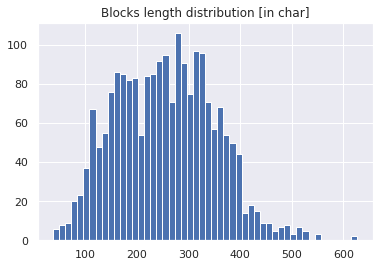

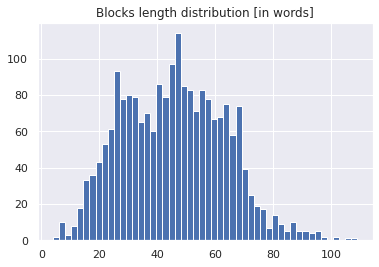

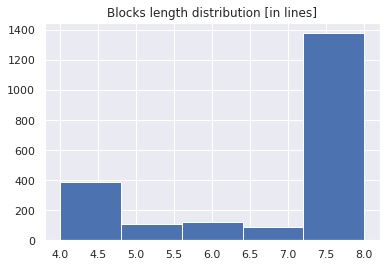

In [14]:
MAX_LENGTH = max(map(len, blocks))
print(f"Max length: {MAX_LENGTH}")

plt.title("Blocks length distribution [in char]")
plt.hist(list(map(len, blocks)), bins=50)
plt.show();

plt.title("Blocks length distribution [in words]")
plt.hist(list(map(lambda block: len(block.split()), blocks)), bins=50)
plt.show();

plt.title("Blocks length distribution [in lines]")
plt.hist(list(map(lambda block: len(block.split('\n')), blocks)), bins=5)
plt.show();

Make collection of used `tokens` and encoding `token_to_id`

In [5]:
tokens = set()

for block in blocks:
    tokens.update(set(block))
tokens = list(tokens)

num_tokens = len(tokens)
print(f"Number of tokens: {num_tokens}")

# Create {symbol: its identifier} (index in tokens list) dictionary
token_to_id = {
    token: index
    for index, token in enumerate(tokens) 
}

Number of tokens: 107


Encode each block using `token_to_id` table

In [7]:
def to_matrix(blocks, max_len=None, pad=token_to_id[' '],
              dtype="int32", batch_first=True):
    """Casts a list of blocks into RNN-digestable matrix."""
    max_len = max_len or max(map(len, blocks))
    blocks_ix = np.zeros([len(blocks), max_len], dtype) + pad

    for i in range(len(blocks)):
        line_ix = [token_to_id[c] for c in blocks[i]]
        blocks_ix[i, :len(line_ix)] = line_ix[:max_len]

    if not batch_first:  # convert [batch, time] into [time, batch]
        blocks_ix = np.transpose(blocks_ix)

    return blocks_ix

In [9]:
# Example: cast random block to matrix, pad with zeros
block = np.random.choice(blocks, size=1)
print(block[0])
print(to_matrix(block))

перемен требуют наши сердца
перемен требуют наши глаза
в нашем смехе и в наших слезах
и в пульсации вен
перемен!
мы ждем перемен
[[ 96  27  66  27  91  27  60  12  31  66  27  37  24  93  31  12  60  64
   50  16  12  76  27  66  17  48  64  49  96  27  66  27  91  27  60  12
   31  66  27  37  24  93  31  12  60  64  50  16  12  20  30  64  56  64
   49  80  12  60  64  50  27  91  12  76  91  27 101  27  12  16  12  80
   12  60  64  50  16 101  12  76  30  27  56  64 101  49  16  12  80  12
   96  24  30  46  76  64  48  16  16  12  80  27  60  49  96  27  66  27
   91  27  60   2  49  91  86  12  44  17  27  91  12  96  27  66  27  91
   27  60]]


## 2. Modeling

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Model 1: RNN from scratch

In [11]:
class CharRNNCell(nn.Module):
    """
    Implement the scheme above as a PyTorch module.
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=100, rnn_num_units=128):
        super(self.__class__, self).__init__()

        self.num_units = rnn_num_units
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)

    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next). 
        We'll call it repeatedly to produce the whole sequence.

        :param x: batch of character ids, containing vector of int64 type
        :param h_prev: previous RNN hidden states, containing matrix 
        [batch, rnn_num_units] of float32 type
        """
        # get vector embedding of x
        x_emb = self.embedding(x)

        # compute next hidden state using self.rnn_update
        x_and_h = torch.cat([h_prev, x_emb], dim=-1)
        h_next = self.rnn_update(x_and_h)
        h_next = torch.tanh(h_next)

        assert h_next.size() == h_prev.size()

        # compute logits for the next character probs
        logits = self.rnn_to_logits(h_next)

        return h_next, F.log_softmax(logits, -1)

    def initial_state(self, batch_size):
        """Return RNN state before it processes the first input (h0)."""
        return torch.zeros(batch_size, self.num_units, requires_grad=True)

In [12]:
def rnn_loop(char_rnn, batch):
    """
    Computes log P(next_character) for all time steps in batch.
    :param batch: an int32 matrix of shape [batch, time], 
    output of to_matrix(batch)
    """
    batch_size, max_length = batch.size()
    hid_state = char_rnn.initial_state(batch_size)

    logprobs = []
    for x_t in batch.transpose(0, 1):
        hid_state, logp_next = char_rnn(x_t, hid_state)  # single step call
        logprobs.append(logp_next)
        
    return torch.stack(logprobs, dim=1)

In [15]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=0.5):
    """
    The function generates text given a phrase of length of at least SEQ_LENGTH.
    :param seed_phrase: prefix characters, the sequence that the RNN 
    is asked to continue
    :param max_length: maximum output length, including seed_phrase length
    :param temperature: coefficient for sampling; higher temperature produces 
    more chaotic outputs, smaller temperature converges to the single 
    most likely output
    """
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)

    # feed the seed phrase if there is any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)

    # start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logp_next = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()[0]

        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens, p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=-1)

    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

Specify creativity values to check model performance while training:

- most likely: predicition is close to argmax
- creative mode performs more stochastic sampling
- chaotic samples in almost uniform scenario ignoring predicted distribution

In [16]:
creativity = {
    'Chaotic mode:': 0.9,
    'Creative mode:': 0.5,
    'Most likely mode:': 0.1,
}

In [ ]:
# check model architecture
char_rnn = CharRNNCell()
char_rnn

CharRNNCell(
  (embedding): Embedding(107, 100)
  (rnn_update): Linear(in_features=228, out_features=128, bias=True)
  (rnn_to_logits): Linear(in_features=128, out_features=107, bias=True)
)

Train CharRNN

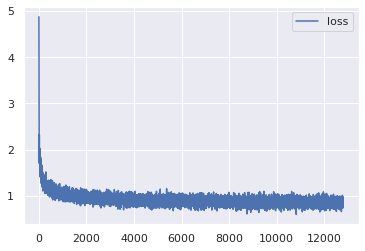

Epoch 200/200

Chaotic mode:
 дон ли, волга ли течет (ну скорнусь                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
---------------

Creative mode:
 дон ли, волга ли течет в котек (ха-ха)
но табын (ай)
мы в стал в город бабовый барт
но я все видно и помнится мой выпал в темноте на них в конскиляю в дорога                                                                                                                                                                                                                                      

In [ ]:
%%time
char_rnn = CharRNNCell()
criterion = nn.NLLLoss()
opt = torch.optim.Adam(char_rnn.parameters(), )
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', factor=0.6)
history = []

MAX_LENGTH = 550
batch_size = 32
n_epochs = 200

for epoch_ix in range(n_epochs):
    indices = torch.randperm(len(blocks))
    local_loss = []
    for start_ix in range(0, len(blocks), batch_size)[:-1]:
        batch_ix = indices[start_ix : start_ix + batch_size]
        batch = np.array(blocks)[batch_ix]
        batch = to_matrix(batch, max_len=MAX_LENGTH)
        batch = torch.tensor(batch, dtype=torch.int64)

        logp_seq = rnn_loop(char_rnn, batch)

        # compute loss
        predictions_logp = logp_seq[:, :-1]
        actual_next_tokens = batch[:, 1:]

        loss = criterion(predictions_logp.contiguous().view(-1, num_tokens),
                        actual_next_tokens.contiguous().view(-1))

        # train with backprop
        loss.backward()
        opt.step()
        opt.zero_grad()

        history.append(loss.data.numpy())
        local_loss.append(loss.data.numpy())

        # if (epoch_ix + 1) % 100 == 0:
    clear_output(True)
    plt.plot(history, label="loss")
    plt.legend()
    plt.show()
    scheduler.step(np.array(local_loss).mean())

    print(f"Epoch {epoch_ix+1}/{n_epochs}\n")
    for name, temperature in creativity.items():
        generated = generate_sample(char_rnn, seed_phrase=' дон ли, волга ли течет ', temperature=temperature)
        print(f"{name}\n{generated}\n---------------\n")


assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

Check few generated blocks with seed phrases

In [ ]:
print(generate_sample(char_rnn, seed_phrase='незабудка - мой любимый цветок ', temperature=0.3))

незабудка - мой любимый цветок (что?)
это страница — покажи на моих под небесть на бит стал собой
я не последний свет, как молодой деньги, будто ты просто не вернул в под вот с ней в темноте
все так на просто под принцерь в детства на столько бы ты не в мой под лицо


In [ ]:
print(generate_sample(char_rnn, seed_phrase=' можешь взять мои деньги ', temperature=0.01))

 можешь взять мои деньги (а-а)
я не помним в небесный мертвых не стать на моей шее тебе в сети
но я не получали в темноте
на моей шее тебе в сети
но я не получали в темноте
но ведь я не помним в небесный мертвых под мой бабки
но я не получали в темноте
но ты не выросе в сердце деньги не под себя на моей шее тебе в сети
но я не получали в темноте
но ты не выросе в сердце деньги не под себя на моей шее тебе в сети
но я не получали в темноте
на моей шее тебе в сети
но я не получали в темноте
на моей шее тебе в сети
но я не получали в темноте
но ты


In [ ]:
print(generate_sample(char_rnn, seed_phrase='мой реп, если коротко, про то что\n', temperature=0.7))

мой реп, если коротко, про то что
лучше под парах её так и она скажи
мама, будто не зовершу любишь в тому так в твоем
и это не хочется на поят из глазам
мне по видишь мир
и лучше не хоть любовь (у-у-у-у)
вы провода, по-почка                                                                                                                                                                                                                                                                                                                                      


### Model 2: LSTM

In [17]:
class CharLSTM(nn.Module):
    def __init__(self, num_tokens=num_tokens, emb_size=100, n_units=128, n_layers=1):
        super(self.__class__, self).__init__()
        self.emb_size = emb_size
        self.n_units = n_units
        self.n_layers = n_layers
        self.emb = nn.Embedding(num_tokens, self.emb_size)
        self.lstm = nn.LSTM(self.emb_size, self.n_units, batch_first=True)
        self.units_to_logits = nn.Linear(self.n_units, num_tokens)
        
    def forward(self, x, h, c):
        assert isinstance(x.data, torch.LongTensor)
        h_seq, (hn, cn) = self.lstm(self.emb(x), (h, c))
        next_logits = self.units_to_logits(h_seq)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp, (hn, cn)
    
    def initial_state(self, batch_size):
        return (torch.zeros(self.n_layers, batch_size, self.n_units),
                torch.zeros(self.n_layers, batch_size, self.n_units))


def lstm_loop(char_lstm, batch):
    """
    Computes log P(next_character) for all time steps in batch.
    :param batch: an int32 matrix of shape [batch_size, time], 
    output of to_matrix(batch)
    """
    batch_size, max_length = batch.size()
    hn, cn = char_lstm.initial_state(batch_size)

    logprobs = []
    for x_n in batch.transpose(0, 1):
        logp_next, (hn, cn) = char_lstm(x_n.view(-1, 1), hn, cn)  # single step
        logprobs.append(logp_next)
        
    return torch.stack(logprobs, dim=1)

In [18]:
def generate_sample_lstm(char_lstm, seed_phrase=' ', max_length=MAX_LENGTH, temperature=0.5):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    char_lstm.eval()
    hn, cn = char_lstm.initial_state(1)

    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)

    #feed the seed phrase, if any
    logp_next, (hn, cn) = char_lstm(x_sequence, hn, cn)
    p_next = F.softmax(logp_next[0, -1, :] / temperature, dim=0).data.numpy()
    next_ix = np.random.choice(num_tokens, p=p_next)
    next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
    chars = [next_ix]
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        logp_next, (hn, cn) = char_lstm(chars[-1], hn, cn)
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()[0][0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens, p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        chars.append(next_ix)
        
    return seed_phrase + ''.join([tokens[ix.data.numpy()[0][0]] for ix in chars])

Train CharLSTM

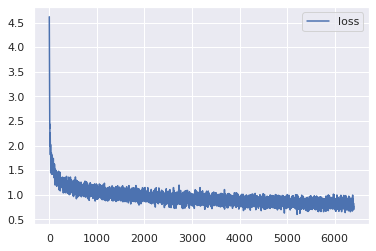

Epoch 100/100

Chaotic mode:
 дон ли, волга ли течет из мир
от меня заберу всемнять – где ламного фумсамом
молодожда зероки рэп летали, никогда закатст меня
ты междесть верноски соффстайки
и упадаем из молокады — не билеться (пятать)
я не хочет мирон — нас в слица
всё, что не лицо                                                                                                                                                                                                                                                                                                                                                                                        
---------------

Creative mode:
 дон ли, волга ли течет (нет)
ты было в моей шана, мои сердце — заподотите крышь когда на мне
и ещё один кровь не волка                                                                                                                                                                                               

In [19]:
%%time
char_lstm = CharLSTM()
criterion = nn.NLLLoss()
opt = torch.optim.Adam(char_lstm.parameters())
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', factor=0.6)
history_lstm = []

MAX_LENGTH = 550
batch_size = 32
n_epochs = 100

for epoch_ix in range(n_epochs):
    indices = torch.randperm(len(blocks))
    local_loss = []

    char_lstm.train()

    for start_ix in range(0, len(blocks), batch_size)[:-1]:
        batch_ix = indices[start_ix : start_ix + batch_size]
        batch = np.array(blocks)[batch_ix]
        batch = to_matrix(batch, max_len=MAX_LENGTH)
        batch = torch.tensor(batch, dtype=torch.int64)

        logp_seq = lstm_loop(char_lstm, batch)

        # print(logp_seq.shape)

        # compute loss
        predictions_logp = logp_seq[:, :-1]
        actual_next_tokens = batch[:, 1:]

        loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                         actual_next_tokens.contiguous().view(-1))

        # train with backprop
        loss.backward()
        opt.step()
        opt.zero_grad()

        history_lstm.append(loss.data.numpy())
        local_loss.append(loss.data.numpy())

    clear_output(True)
    plt.plot(history_lstm, label="loss")
    plt.legend()
    plt.show()
    scheduler.step(np.array(local_loss).mean())

    print(f"Epoch {epoch_ix+1}/{n_epochs}\n")
    for name, temperature in creativity.items():
        generated = generate_sample_lstm(char_lstm, seed_phrase=' дон ли, волга ли течет ', temperature=temperature)
        print(f"{name}\n{generated}\n---------------\n")

assert np.mean(history_lstm[:10]) > np.mean(history_lstm[-10:]), "LSTM didn't converge."

Save/load model weights 

In [20]:
# SAVE MODEL
# model_path = 'poetry_char_lstm.pth'
# torch.save(char_lstm.state_dict(), model_path)

# LOAD MODEL
# model = CharLSTM()
# model.load_state_dict(torch.load(model_path))
# model.eval()

Check few generated blocks with seed phrases

In [45]:
print(generate_sample_lstm(char_lstm, seed_phrase='каждый день ', temperature=0.1))

каждый день недели, но я не полетел не верить
я не знаю, что я все всегда на моей шее лет
но ты не пригода не верить меня не полетели на моей шанс
и ты не вернуть на моей моей моей моей мой колет
но я не полетел на моей мой колетерный стран
и ты стал на моей шее лицо
ты не полетел на моей музыкал (а-а)
я не знаю, что ты стал в парень меня в сети
что ты не полетел на тебе в новый мой кормет
но я не знаю, что я полетел на баттл
но ты стал в тебя уже не полетели на моей шанс
и так много сказал мне не надо мной под подруга под подошвой
но я не полетел на моей музыкой кровь
половина хочет всех в тебе в новый мой колет
но я не


In [346]:
print(generate_sample_lstm(char_lstm, seed_phrase='у лукоморья дуб зеленый\n', temperature=0.9))

у лукоморья дуб зеленый
от стиля холодно, мы даю монешь мир, подались в её камн
мы могить под обидом, слабо
тупо если том лапы, стёл я не смогим палишь — не значный (oba)
так, детки
прямо пальца, меня в них обзам                                                                                                                                                                                                                                                                                                                                                                                                                                


In [234]:
print(generate_sample_lstm(char_lstm, seed_phrase='скажи-ка, дядя, ведь недаром\n', temperature=0.3))

скажи-ка, дядя, ведь недаром
я был в моей моей мой город
я не помнишь, без стенит лицо
ты свой кара детство, но я не спешал на братанов
на моей меня, я не знаю на конец
я все принцисите ветра — тело кристи
с нос и спортих под подругами вода, но я сделал ставил с ней
я получить на деньги (просто танцы)
я не знаю, не забелый ставод (как мольше)
хоть тебя вышел тебя не стал в тебе в руках сердце полять на мой класс (у-у)
я не знаю в потерянный колеце (ай)
это все стрельно, я не подали мой стать
и я сделал свой моих ночь на полова не верить с полосова                                                                           


In [472]:
print(generate_sample_lstm(char_lstm, seed_phrase='захожу в клуб, ', temperature=0.5))

захожу в клуб, судь за мира было бедно, и не так холодный солнце
мам никогда не помнить красно под пропал не больше (е)
он было просто такой за мной дома
теряем про нет, не у меня всегда меня не скажи (чёрный)
как чёрный красно в сети
что ты может не свой трепол
не рассвет не полетели мою стану посторить на вернуть                                                                                                                                                                                                                                                                                                                        


## As a conclusion:
- both models CharRNN and CharLSTM were able to fit on prepared data
- LSTM training epoch lasts longer (due to complexity of the model), but it learns quicker and generates phrases which are more similar to real words
- temperature/creativity parameter helps to generate poetry in more or less stable way  